In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
%matplotlib inline

# Carga de dataset

In [2]:
data = pd.read_csv('insurance.csv')

# Exploración de datos

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       348 non-null    int64  
 1   sex       348 non-null    int64  
 2   bmi       348 non-null    float64
 3   children  348 non-null    int64  
 4   smoker    348 non-null    int64  
 5   region    348 non-null    int64  
 6   charges   348 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 19.2 KB


In [5]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,39.591954,0.508621,30.676552,1.091954,0.232759,1.497126,14016.426293
std,14.417015,0.500646,5.625850,1.192021,0.423198,1.104089,12638.887852
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1137.011000
25%,27.000000,0.000000,26.782500,0.000000,0.000000,1.000000,4888.466125
50%,40.000000,1.000000,30.300000,1.000000,0.000000,2.000000,9719.305250
75%,53.000000,1.000000,34.777500,2.000000,0.000000,2.000000,19006.316150
max,64.000000,1.000000,49.060000,5.000000,1.000000,3.000000,51194.559140


In [6]:
data.count()

age         348
sex         348
bmi         348
children    348
smoker      348
region      348
charges     348
dtype: int64

In [7]:
data.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

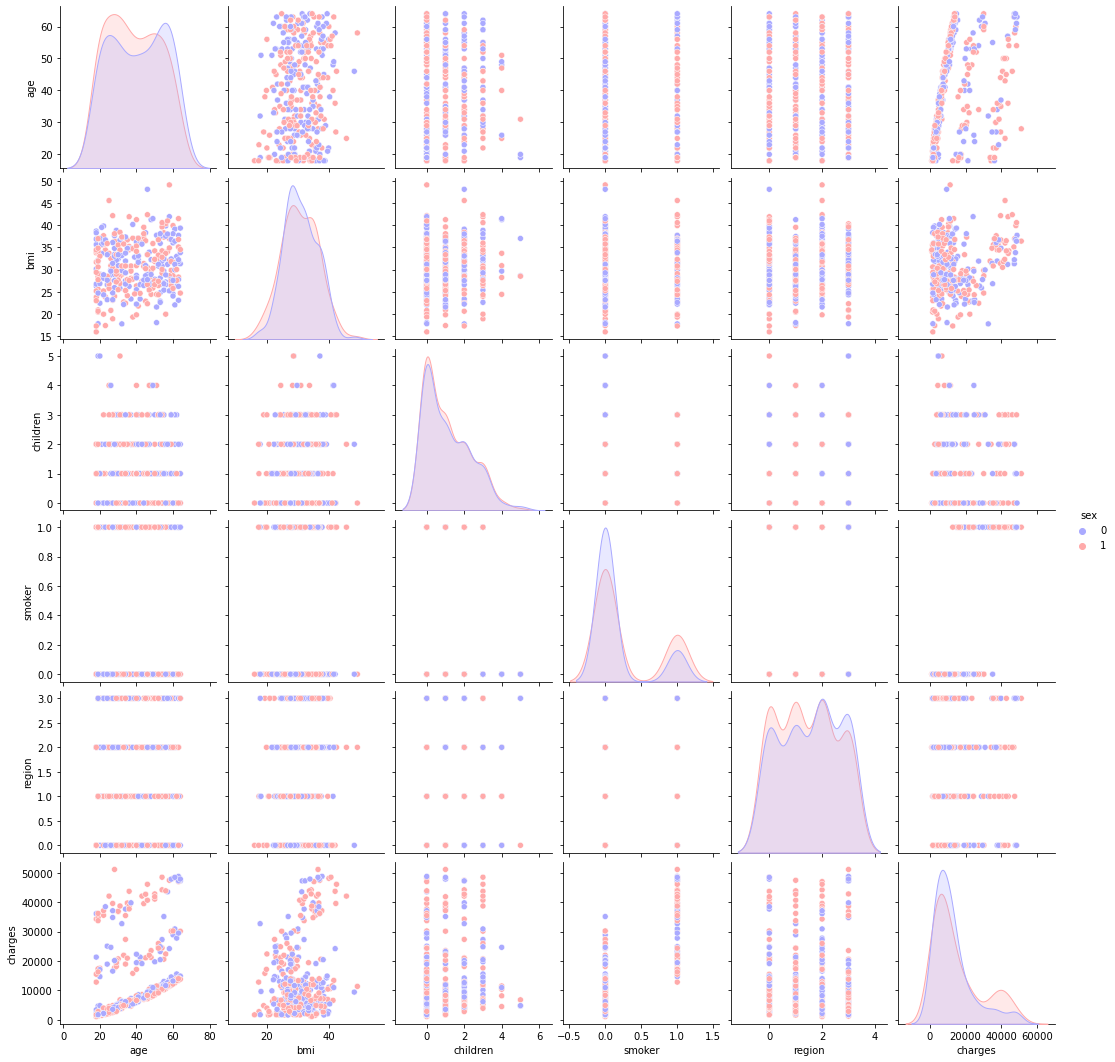

In [8]:
sns.pairplot(data=data, hue='sex', palette='bwr')

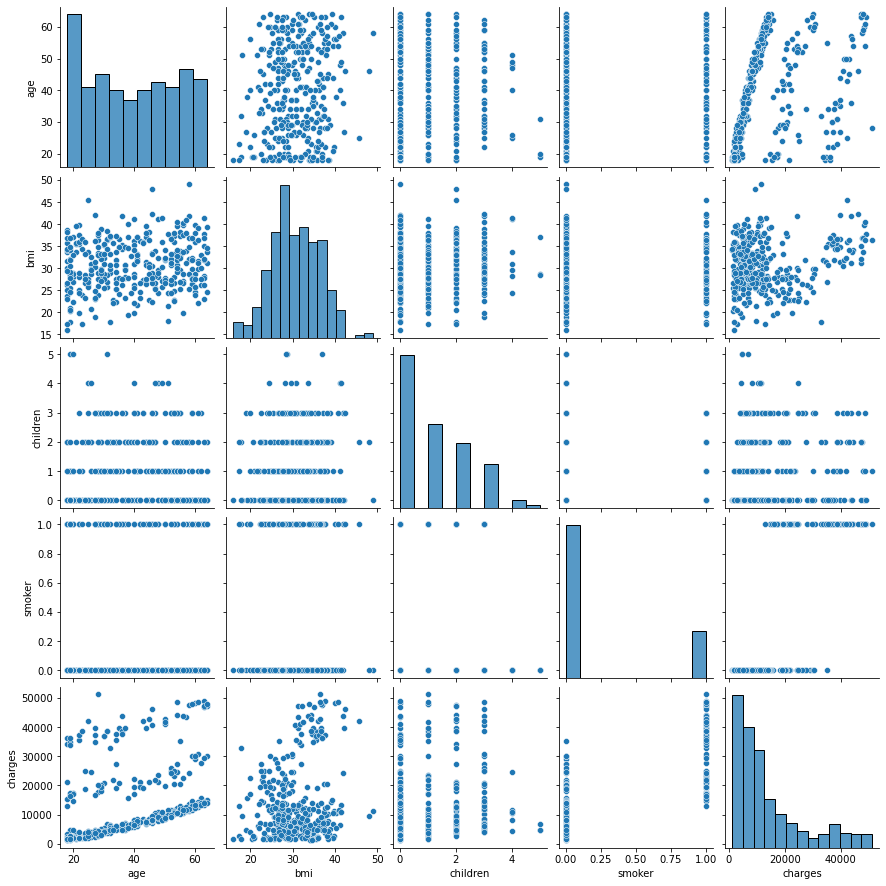

In [9]:
sns.pairplot(data[['age','bmi','children','smoker','charges']])

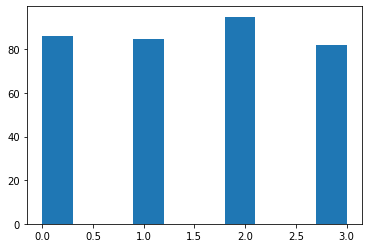

In [10]:
_ = plt.hist(data.region)

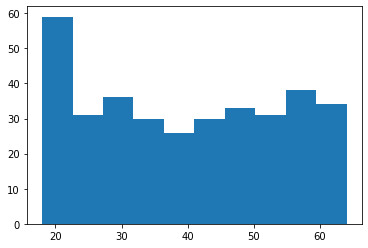

In [11]:
_ = plt.hist(data.age)

# Preparación de los datos - datos faltantes

In [12]:
data.count()

age         348
sex         348
bmi         348
children    348
smoker      348
region      348
charges     348
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       348 non-null    int64  
 1   sex       348 non-null    int64  
 2   bmi       348 non-null    float64
 3   children  348 non-null    int64  
 4   smoker    348 non-null    int64  
 5   region    348 non-null    int64  
 6   charges   348 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 19.2 KB


Como se pueden observar, no hay datos nulos en el dataset ya que hay un total de 348 registros y 348 son no nulos

# Preparación de los datos - datos categóricos

In [14]:
le = preprocessing.LabelEncoder()
ohc = preprocessing.OneHotEncoder()

In [15]:
le.fit(data['sex'])
le.fit(data['smoker'])

LabelEncoder()

In [16]:
ohc.fit(data[['region']])

OneHotEncoder()

# Dividir en training y test

In [17]:
target = data['charges']
data = data.drop(columns=['charges'])
data = data[['bmi']]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33)

# Preparación de los datos - escala

In [19]:
scaler = preprocessing.StandardScaler()

In [20]:
scaler.fit(data)

StandardScaler()

# Modelación lineal

### Algoritmo least squares

In [21]:
x_mean = np.mean(X_train.values)
y_mean = np.mean(y_train.values)

n = len(X_train.values)

numerator = 0
denominator = 0
for i in range(n):
    numerator += (X_train.values[i] - x_mean) * (y_train.values[i] - y_mean)
    denominator += (X_train.values[i] - x_mean) ** 2
    
b1 = numerator / denominator
b0 = y_mean - (b1 * x_mean)

print(b1, b0)

[376.62039535] [2015.89629497]


In [22]:
x_mean = np.mean(X_train.values)
y_mean = np.mean(y_train.values)

n = len(X_train.values)

numer = 0
denom = 0

for i in range(n):
    numer += (X_train.values[i] - x_mean) * (y_train.values[i] - y_mean)
    denom += (X_train.values[i] - x_mean) ** 2
    m = numer / denom
    c = y_mean - (m * x_mean)
    

### Utilizando la libreria LinearRegression de sklearn

In [23]:
regression = LinearRegression()

In [24]:
regression.fit(X_train, y_train)

LinearRegression()

### Utilizando la libreria Lasso de sklearn

In [25]:
lasso = Lasso(alpha=0.1)

In [26]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

# Evaluación de los modelos

### Algoritmo least squares

In [27]:
print('Coeficientes: ', m, c)

Coeficientes:  [376.62039535] [2015.89629497]


In [28]:
#RMSE

rmse = 0
for i in range(n):
    y_pred = c + m * X_train.values[i]
    rmse += (y_train.values[i] - y_pred) ** 2
rmse = np.sqrt(rmse/n)
print("RMSE")
print(rmse)

RMSE
[11654.29125861]


In [29]:
ss_tot = 0
ss_res = 0
for i in range(n):
    y_pred = c + m * X_train.values[i]
    ss_tot += (y_train.values[i] - y_mean) ** 2
    ss_res += (y_train.values[i] - y_pred) ** 2
r2 = 1 - (ss_res/ss_tot)
print(r2)

[0.0329405]


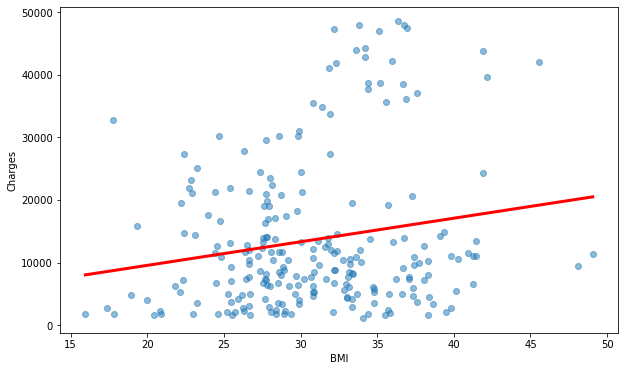

In [30]:
max_x = np.max(X_train.values)
min_x = np.min(X_train.values)
 
x = np.linspace(min_x, max_x, 1000)
y = c + m * x

plt.figure(figsize=(10,6))
plt.plot(x, y, color='red', linewidth=3)
plt.scatter(X_train.values, y_train.values,  alpha=0.5)
 
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

### Linear Regression

In [31]:
#Coeficientes
regression.coef_

array([376.62039535])

In [32]:
#MAE
mean_absolute_error(regression.predict(X_test), y_test)

10977.950073209691

In [33]:
#MSE
mean_squared_error(regression.predict(X_test), y_test)

187019635.88713053

In [34]:
#RMSE
r2_score(regression.predict(X_test), y_test)

-43.924866104256

In [35]:
X2 = sm.add_constant(X_test.values)
est = sm.OLS(y_test.values, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     8.829
Date:                Mon, 19 Apr 2021   Prob (F-statistic):            0.00362
Time:                        20:13:42   Log-Likelihood:                -1256.9
No. Observations:                 115   AIC:                             2518.
Df Residuals:                     113   BIC:                             2523.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6374.2596   7252.165     -0.879      0.3

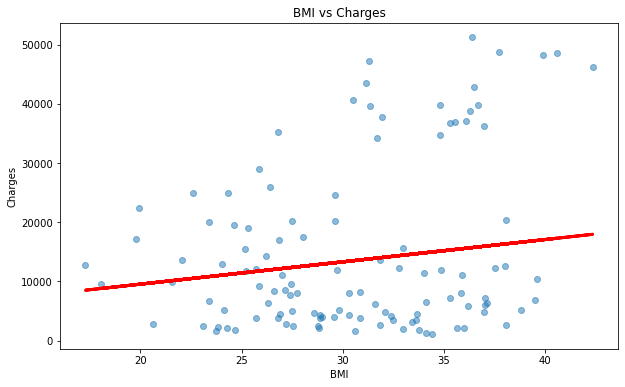

In [36]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, alpha=0.5)

plt.plot(X_test, regression.predict(X_test), color='red', linewidth=3)

plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

### Lasso

In [37]:
lasso.coef_

array([376.61732944])

In [38]:
lasso.intercept_

2015.9906683823974

# Regresión Polinomial

In [39]:
poly = PolynomialFeatures()

In [40]:
poly_train = poly.fit_transform(X_train)

In [41]:
poly_test = poly.fit_transform(X_test)

In [42]:
pl = LinearRegression()
pl.fit(poly_train, y_train)

LinearRegression()

In [43]:
print(mean_squared_error(pl.predict(poly_test), y_test))
print(r2_score(pl.predict(poly_test), y_test))

187840119.11799562
-40.47192659991876


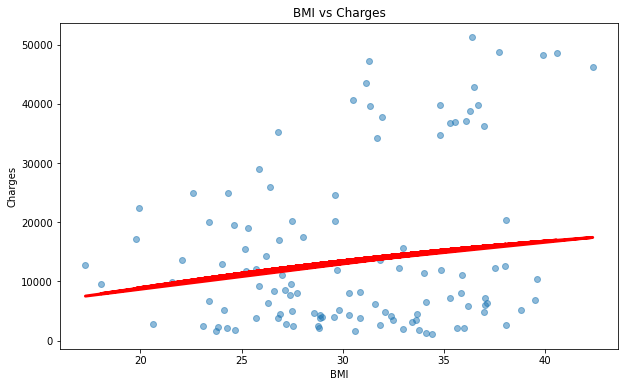

In [44]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, alpha=0.5)

plt.plot(X_test, pl.predict(poly_test), '-r', color='red', linewidth=3)

plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()